In [1]:
import pandas as pd
import matplotlib.pyplot as pt
import numpy as np
import seaborn as sb


Now i am going to import data sets

In [2]:
data=pd.read_csv("DataSet/kindeyStoneUrineAnalysis.csv")

In [3]:
data.head()

,gravity,ph,osmo,cond,urea,calc,target
0,1.021,4.91,725,14.0,443,2.45,0
1,1.017,5.74,577,20.0,296,4.49,0
2,1.008,7.20,321,14.9,101,2.36,0
3,1.011,5.51,408,12.6,224,2.15,0
4,1.005,6.52,187,7.5,91,1.16,0


In [4]:
data.dtypes

gravity    float64
ph         float64
osmo         int64
cond       float64
urea         int64
calc       float64
target       int64
dtype: object

It is time to do some EDA on this data,<br>
1:I will first check if there are any categorical data and numerical data<br>
2: I will check for null values in numerical data<br>
    a: If i find null or NAN I will either try to replace it with suitable data <br>
3:I will split the data into train, validate and test data set (80%,10%,10%)<br>

In [5]:
[items for items in data.columns if data[items].dtype=='O' ]

[]

<h3>It seems there are no categoricals data</h3> <br>
<h3>Now it's time to check for null values</h3>

In [6]:
[missing_items for missing_items in data.columns if data[missing_items].isnull().sum()!=0 ]

[]

<h4>No missing data too and now let's begin to split it into train, validate and test sample</h4>

In [7]:
data_train=data.sample(frac=0.8,random_state=1230)
data_test=data.drop(data_train.index)
data_validate=data_test.sample(frac=0.5,random_state=1231)
data_test=data_test.drop(data_validate.index)

In [8]:
data_train.shape


(63, 7)

In [9]:
data_test.shape

(8, 7)

In [10]:
data_validate.shape


(8, 7)

<h4>Let us visualize our data</h4>


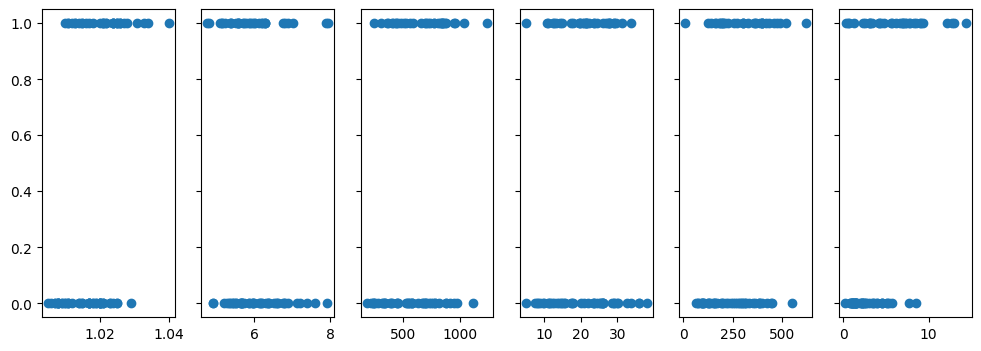

In [11]:
data_y=data.loc[:,["target"]]
fig,axes=pt.subplots(1,6 ,sharey=True,figsize=(12,4))
for i in range(len(axes)):
    axes[i].scatter(data.to_numpy()[:,i],data_y.to_numpy())



In [12]:
data.drop(["target"],axis=1).columns

Index(['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc'], dtype='object')

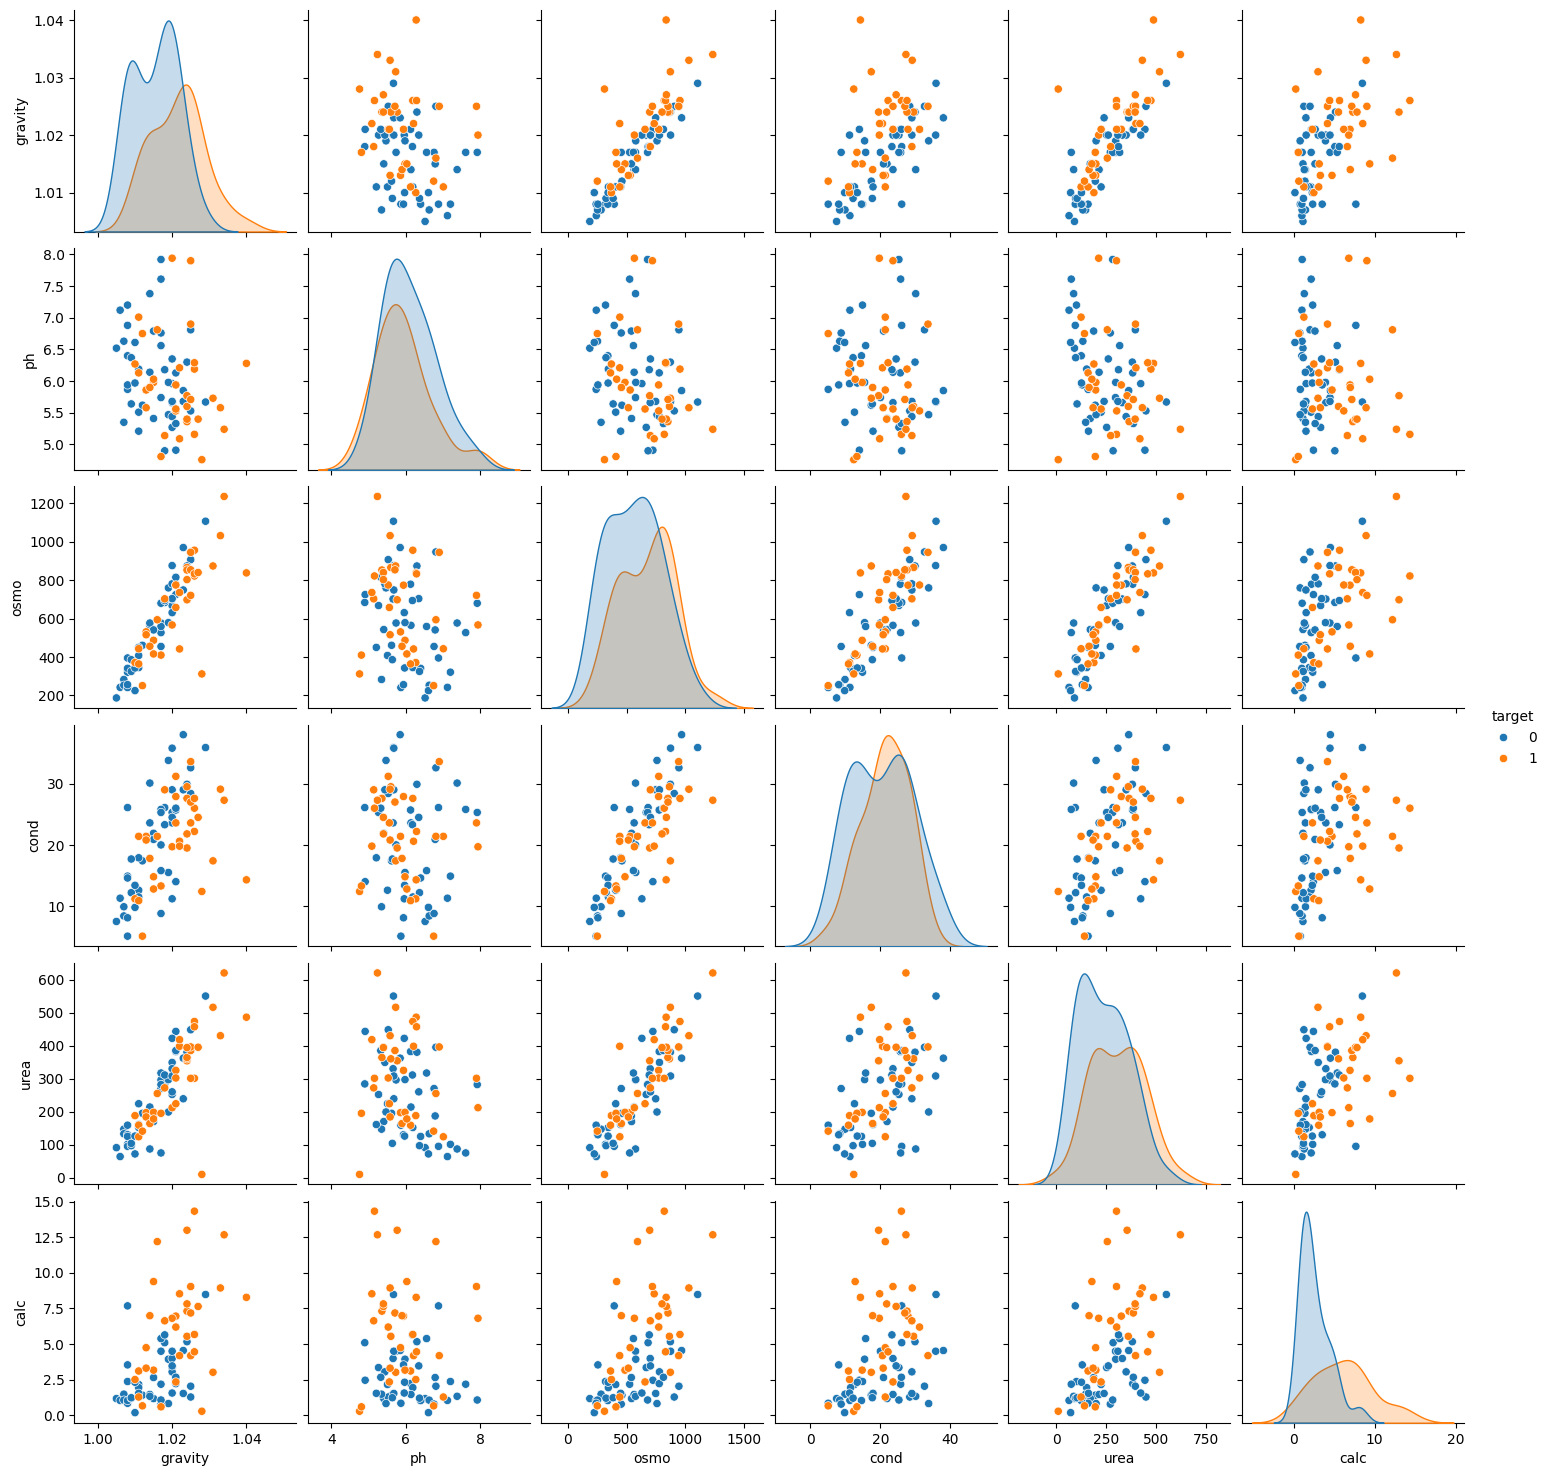

In [13]:
sb.pairplot(data,vars=['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc'],hue="target")


In [14]:
X=data_train.drop(["target"],axis=1)
Y=data_train.loc[:,["target"]]

In [15]:
X_test=data_test.drop(["target"],axis=1)
Y_test=data_test.loc[:,["target"]]

In [16]:
X_validate=data_validate.drop(["target"],axis=1)
Y_validate=data_validate.loc[:,["target"]]

In [17]:
X=X.to_numpy()
Y=Y.to_numpy()
X_test=X_test.to_numpy()
Y_test=Y_test.to_numpy()
X_validate=X_validate.to_numpy()
Y_validate=Y_validate.to_numpy()


<h4>Now we need to standaraize the data</h4>

In [18]:
X_mean=np.mean(X,axis=0)
X_std=np.std(X,axis=0)
X=(X-X_mean)/X_std
X_test=(X_test-X_mean)/X_std
X_validate=(X_validate-X_mean)/X_std

Y=Y.flatten()
Y_test=Y_test.flatten()
Y_validate=Y_validate.flatten()

In [19]:
Y

    

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0],
      dtype=int64)

In [20]:
w = np.random.randn(X.shape[1]) * 0.01 
b=np.random.uniform()
lr=0.01
lambda_=0.001

In [21]:
class Logistic_Regression():
    def __init__ (self,X,Y,w,b,lr,lambda_):
        self.X=X
        self.Y=Y
        self.w=w
        self.b=b
        self.lr=lr
        self.lambda_= lambda_
        self.m=len(Y)
    def predict(self):
        self.ys=np.dot(self.X,self.w)+self.b
    def sigmoid(self):
        self.z=1/(1+np.exp(-self.ys))
    def cost(self):
        epi=1e-10
        lost_calc=-(self.Y*np.log(self.z+epi)+(1-self.Y)*np.log(1-self.z+epi))
        cost_calc=np.sum(lost_calc)/self.m
        return cost_calc
    def update_weights_biases(self):
        d_w=np.dot((self.Y-self.z),self.X)/self.m
        d_b=np.sum(self.Y-self.z)/self.m
        self.w+=self.lr*d_w
        self.b+=self.lr*d_b
    def regularaization_update_weights_bias(self):
        d_w=np.dot((self.Y-self.z),self.X)/self.m
        d_b=np.sum(self.Y-self.z)/self.m
        self.w+= self.lr*(d_w - self.lambda_ * self.w)
        self.b+=self.lr*d_b 
    def predict_newdata(self,x_new,w):
        self.ys=np.dot(x_new,w)+self.b
        self.z=1/(1+np.exp(-self.ys))
        predictions = (self.z > 0.5).astype(int)
        return predictions
 
        

In [22]:
obj=Logistic_Regression(X,Y,w,b,lr,lambda_)

<h3>Let's do this without regularization</h3>

In [23]:
x_plot=[]
y_plot=[]

In [24]:
for i in range(1000):
    obj.predict()
    obj.sigmoid()
    n=obj.cost()
    # print(f'weight is {obj.w} bias is {obj.b} at {i}')
    # print(f'cost is {n} at {i}')
    x_plot.append(i)
    y_plot.append(n)
    obj.update_weights_biases()

cost is 0.7127698848177376 at 0
cost is 0.7108938441731755 at 1
cost is 0.7090446952700167 at 2
cost is 0.7072219667772324 at 3
cost is 0.7054251944986113 at 4
cost is 0.7036539213604034 at 5
cost is 0.7019076973929803 at 6
cost is 0.70018607970685 at 7
cost is 0.6984886324633411 at 8
cost is 0.6968149268402826 at 9
cost is 0.6951645409929745 at 10
cost is 0.6935370600107549 at 11
cost is 0.6919320758694523 at 12
cost is 0.690349187379997 at 13
cost is 0.6887880001334671 at 14
cost is 0.6872481264428302 at 15
cost is 0.6857291852816256 at 16
cost is 0.68423080221984 at 17
cost is 0.6827526093571947 at 18
cost is 0.6812942452540817 at 19
cost is 0.6798553548603505 at 20
cost is 0.6784355894421576 at 21
cost is 0.6770346065070686 at 22
cost is 0.6756520697276038 at 23
cost is 0.6742876488634008 at 24
cost is 0.672941019682164 at 25
cost is 0.6716118638795641 at 26
cost is 0.6702998689982355 at 27
cost is 0.6690047283460192 at 28
cost is 0.6677261409135866 at 29
cost is 0.6664638112915731

Text(0, 0.5, 'cost')

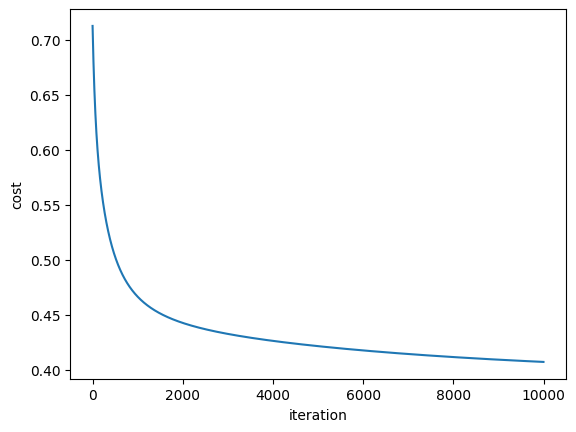

In [25]:
pt.plot(x_plot,y_plot)
pt.xlabel("iteration")
pt.ylabel("cost")

In [26]:
w2=w
w2

array([ 2.09117988,  0.04596019, -0.76274589, -0.88982697, -0.47011632,
        1.66118816])

In [27]:
pre=obj.predict_newdata(X_validate,w2)
accuracy_no_reg = np.mean(pre == Y_validate) * 100
print(f"Accuracy: {accuracy_no_reg:.2f}%")

Accuracy: 62.50%


<h4>Now with Regularization</h3>

In [28]:
x_plot=[]
y_plot=[]

In [29]:
for i in range(1000):
    obj.predict()
    obj.sigmoid()
    n_r=obj.cost()
    # print(f'cost is {n_r} at {i}')
    x_plot.append(i)
    y_plot.append(n_r)
    obj.regularaization_update_weights_bias()

cost is 0.4069771237956356 at 0
cost is 0.4069784688381838 at 1
cost is 0.4069798155959546 at 2
cost is 0.4069811640595053 at 3
cost is 0.4069825142194724 at 4
cost is 0.4069838660665719 at 5
cost is 0.4069852195915984 at 6
cost is 0.40698657478542394 at 7
cost is 0.40698793163899755 at 8
cost is 0.4069892901433447 at 9
cost is 0.4069906502895662 at 10
cost is 0.406992012068838 at 11
cost is 0.4069933754724098 at 12
cost is 0.4069947404916046 at 13
cost is 0.40699610711781875 at 14
cost is 0.40699747534251995 at 15
cost is 0.4069988451572476 at 16
cost is 0.40700021655361157 at 17
cost is 0.40700158952329196 at 18
cost is 0.4070029640580378 at 19
cost is 0.40700434014966747 at 20
cost is 0.4070057177900668 at 21
cost is 0.4070070969711888 at 22
cost is 0.40700847768505427 at 23
cost is 0.407009859923749 at 24
cost is 0.4070112436794248 at 25
cost is 0.40701262894429824 at 26
cost is 0.4070140157106502 at 27
cost is 0.4070154039708251 at 28
cost is 0.4070167937172305 at 29
cost is 0.407

Text(0, 0.5, 'cost')

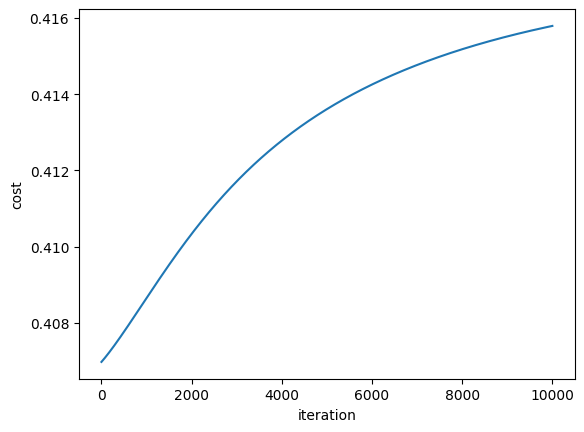

In [30]:
pt.plot(x_plot,y_plot)
pt.xlabel("iteration")
pt.ylabel("cost")

In [31]:
w3=w

<h4>Now lets validate the data</h4>

In [32]:
pre=obj.predict_newdata(X_validate,w3)
accuracy_reg = np.mean(pre == Y_validate) * 100
print(f"Accuracy: {accuracy_reg:.2f}%")

Accuracy: 62.50%


In [33]:
w


array([ 1.73505079,  0.03258808, -0.64207264, -0.70403941, -0.3127795 ,
        1.38069519])